Preliminary things to do to understand the dataset. 

In [1]:
# Importing necessary libraries
import pandas as pd
# Load the dataset from the current directory
df = pd.read_csv('./obesity.csv')

#display the number of columns and rows
shape = df.shape
print('shape =',shape)
print("------------------------------------")
# Display the first few rows of the dataset to ensure it's loaded correctly
df.head()

shape = (2111, 17)
------------------------------------


,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [2]:
# Get an overview of the dataset, including non-null counts and data types
print("overview of the dataset")
df.info()

overview of the dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF       

In [3]:
# Create a DataFrame summarizing the column information along with unique values
summary = pd.DataFrame({
    'Data Type': df.dtypes,
    'Number of Null Values': df.isnull().sum(),
    'Percentage of Null Values': (df.isnull().sum() / len(df)) * 100,
    'Number of Unique Values': df.nunique()
})

# Display the summary
summary


,Data Type,Number of Null Values,Percentage of Null Values,Number of Unique Values
Gender,object,0,0.0,2
Age,float64,0,0.0,1402
Height,float64,0,0.0,1574
Weight,float64,0,0.0,1525
family_history_with_overweight,object,0,0.0,2
FAVC,object,0,0.0,2
FCVC,float64,0,0.0,810
NCP,float64,0,0.0,635
CAEC,object,0,0.0,4
SMOKE,object,0,0.0,2


In [4]:
# Get a quick statistical summary of the numeric columns
print("statistical summary of the numeric columns")
df.describe()

statistical summary of the numeric columns


,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


In [5]:
# Check for duplicate rows in the dataset
duplicate_rows = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_rows}")

Number of duplicate rows: 24


In [6]:
# Identify categorical columns (typically columns with data type 'object')
categorical_columns = df.select_dtypes(include=['object']).columns

# List unique values for each categorical column
for col in categorical_columns:
    unique_vals = df[col].unique()
    print(f"Unique values for '{col}':")
    print(unique_vals)
    print("------------------------------------")


Unique values for 'Gender':
['Female' 'Male']
------------------------------------
Unique values for 'family_history_with_overweight':
['yes' 'no']
------------------------------------
Unique values for 'FAVC':
['no' 'yes']
------------------------------------
Unique values for 'CAEC':
['Sometimes' 'Frequently' 'Always' 'no']
------------------------------------
Unique values for 'SMOKE':
['no' 'yes']
------------------------------------
Unique values for 'SCC':
['no' 'yes']
------------------------------------
Unique values for 'CALC':
['no' 'Sometimes' 'Frequently' 'Always']
------------------------------------
Unique values for 'MTRANS':
['Public_Transportation' 'Walking' 'Automobile' 'Motorbike' 'Bike']
------------------------------------
Unique values for 'NObeyesdad':
['Normal_Weight' 'Overweight_Level_I' 'Overweight_Level_II'
 'Obesity_Type_I' 'Insufficient_Weight' 'Obesity_Type_II'
 'Obesity_Type_III']
------------------------------------


Preprocessing

In [7]:
# Convert column names to lowercase
df.columns = df.columns.str.lower()  # Lowercase column names
print("Column names converted to lowercase:")
print(df.columns)
print("------------------------------------")

# Convert categorical column values to lowercase
for col in df.select_dtypes(include=['object']).columns:
    df[col] = df[col].str.lower()

df.head()

Column names converted to lowercase:
Index(['gender', 'age', 'height', 'weight', 'family_history_with_overweight',
       'favc', 'fcvc', 'ncp', 'caec', 'smoke', 'ch2o', 'scc', 'faf', 'tue',
       'calc', 'mtrans', 'nobeyesdad'],
      dtype='object')
------------------------------------


,gender,age,height,weight,family_history_with_overweight,favc,fcvc,ncp,caec,smoke,ch2o,scc,faf,tue,calc,mtrans,nobeyesdad
0,female,21.0,1.62,64.0,yes,no,2.0,3.0,sometimes,no,2.0,no,0.0,1.0,no,public_transportation,normal_weight
1,female,21.0,1.52,56.0,yes,no,3.0,3.0,sometimes,yes,3.0,yes,3.0,0.0,sometimes,public_transportation,normal_weight
2,male,23.0,1.80,77.0,yes,no,2.0,3.0,sometimes,no,2.0,no,2.0,1.0,frequently,public_transportation,normal_weight
3,male,27.0,1.80,87.0,no,no,3.0,3.0,sometimes,no,2.0,no,2.0,0.0,frequently,walking,overweight_level_i
4,male,22.0,1.78,89.8,no,no,2.0,1.0,sometimes,no,2.0,no,0.0,0.0,sometimes,public_transportation,overweight_level_ii


In [8]:
# Remove duplicate rows and display the change in shape
initial_shape = df.shape
df.drop_duplicates(inplace=True)
final_shape = df.shape
print(f"Duplicates removed. Initial shape: {initial_shape}, Final shape: {final_shape}")
print("------------------------------------")

Duplicates removed. Initial shape: (2111, 17), Final shape: (2087, 17)
------------------------------------


In [ ]:
Exploratory Data Analysis

Distribution of Numeric Features 

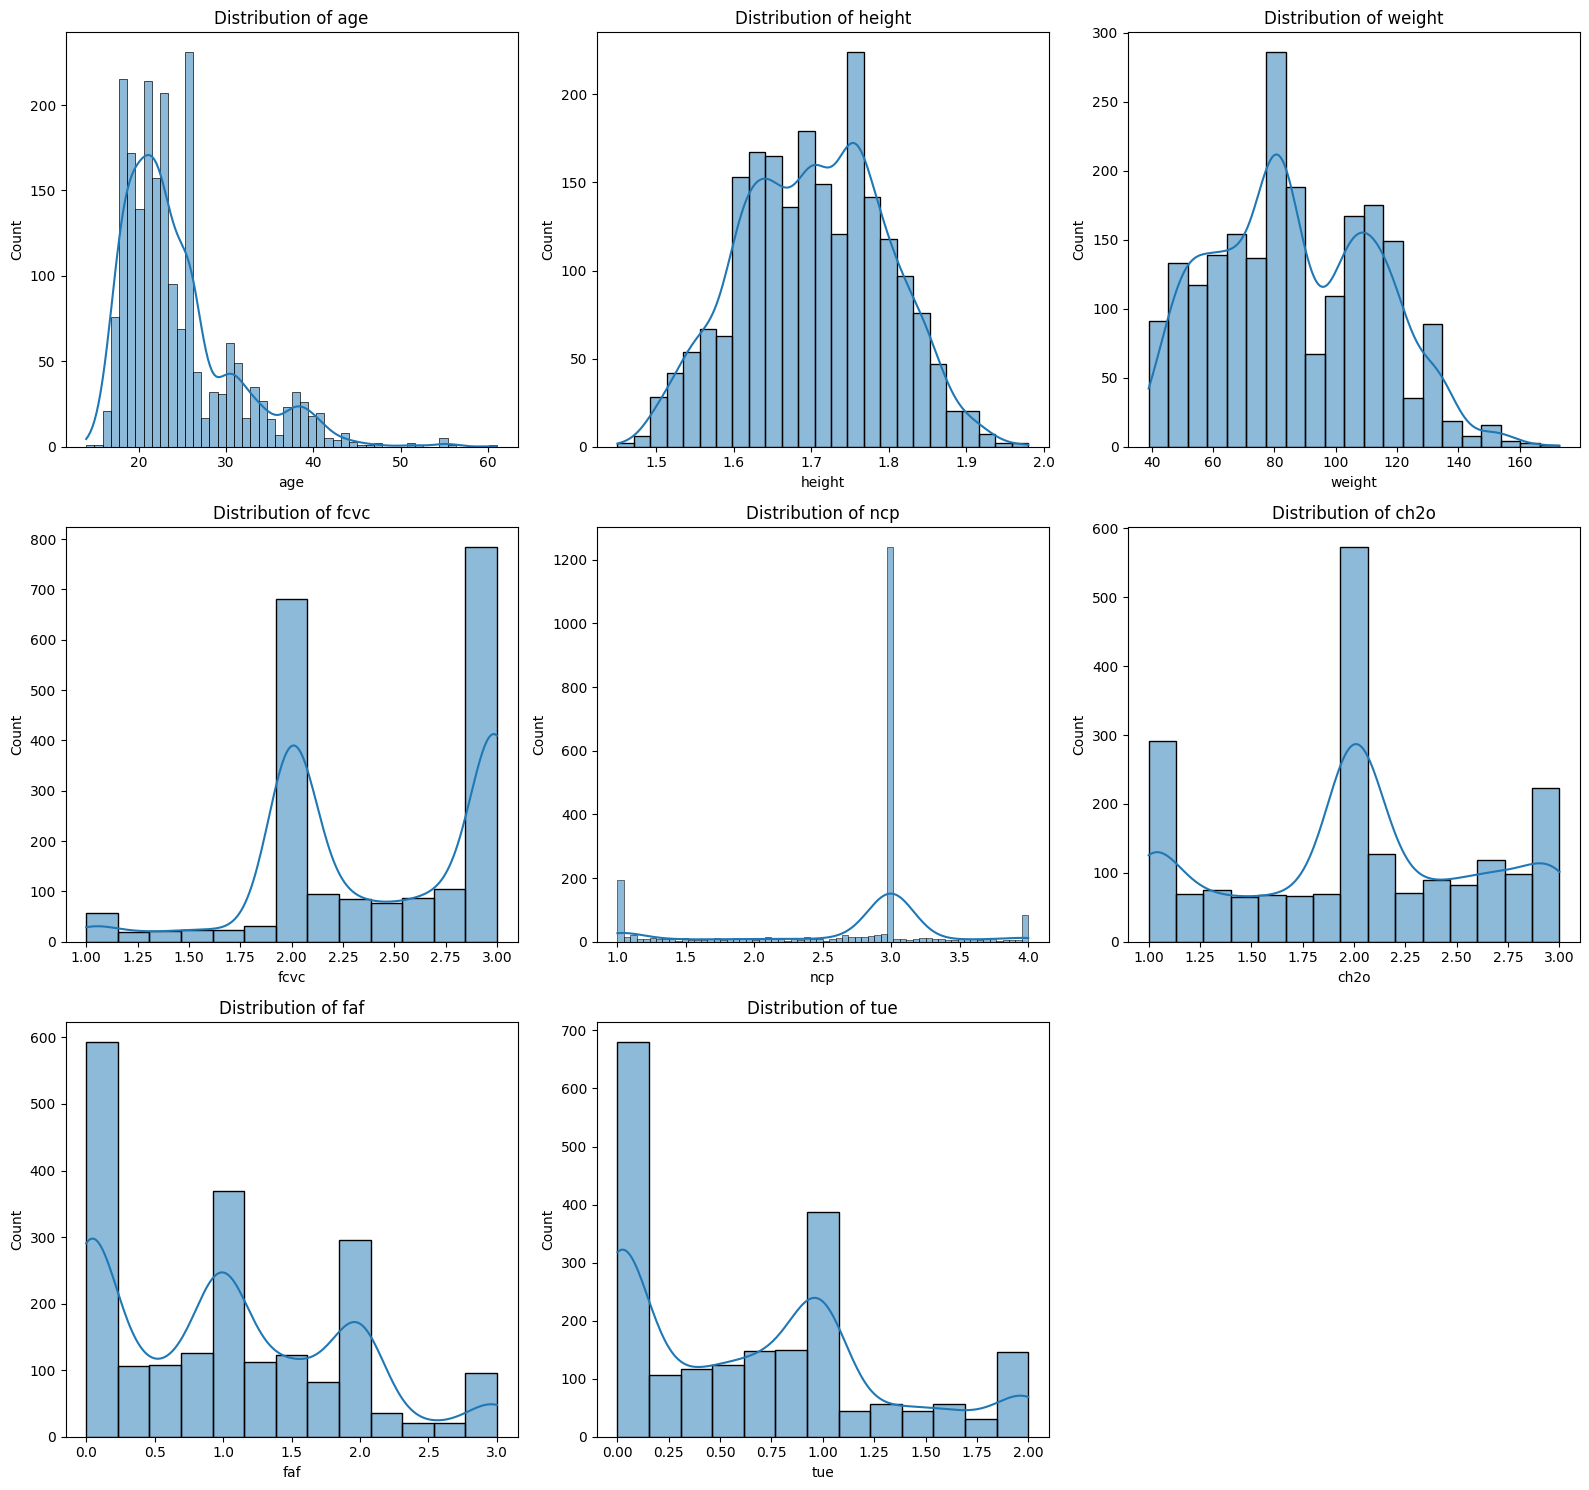

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot histograms and KDE for numeric features
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Dynamically calculate number of rows needed for subplots
n_cols = 3  # Number of plots per row
n_rows = (len(numeric_columns) + n_cols - 1) // n_cols  # Round up number of rows

plt.figure(figsize=(16, 5 * n_rows))  # Adjust the figure size based on rows
for i, col in enumerate(numeric_columns):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

In [ ]:
Distribution of Categorical Features

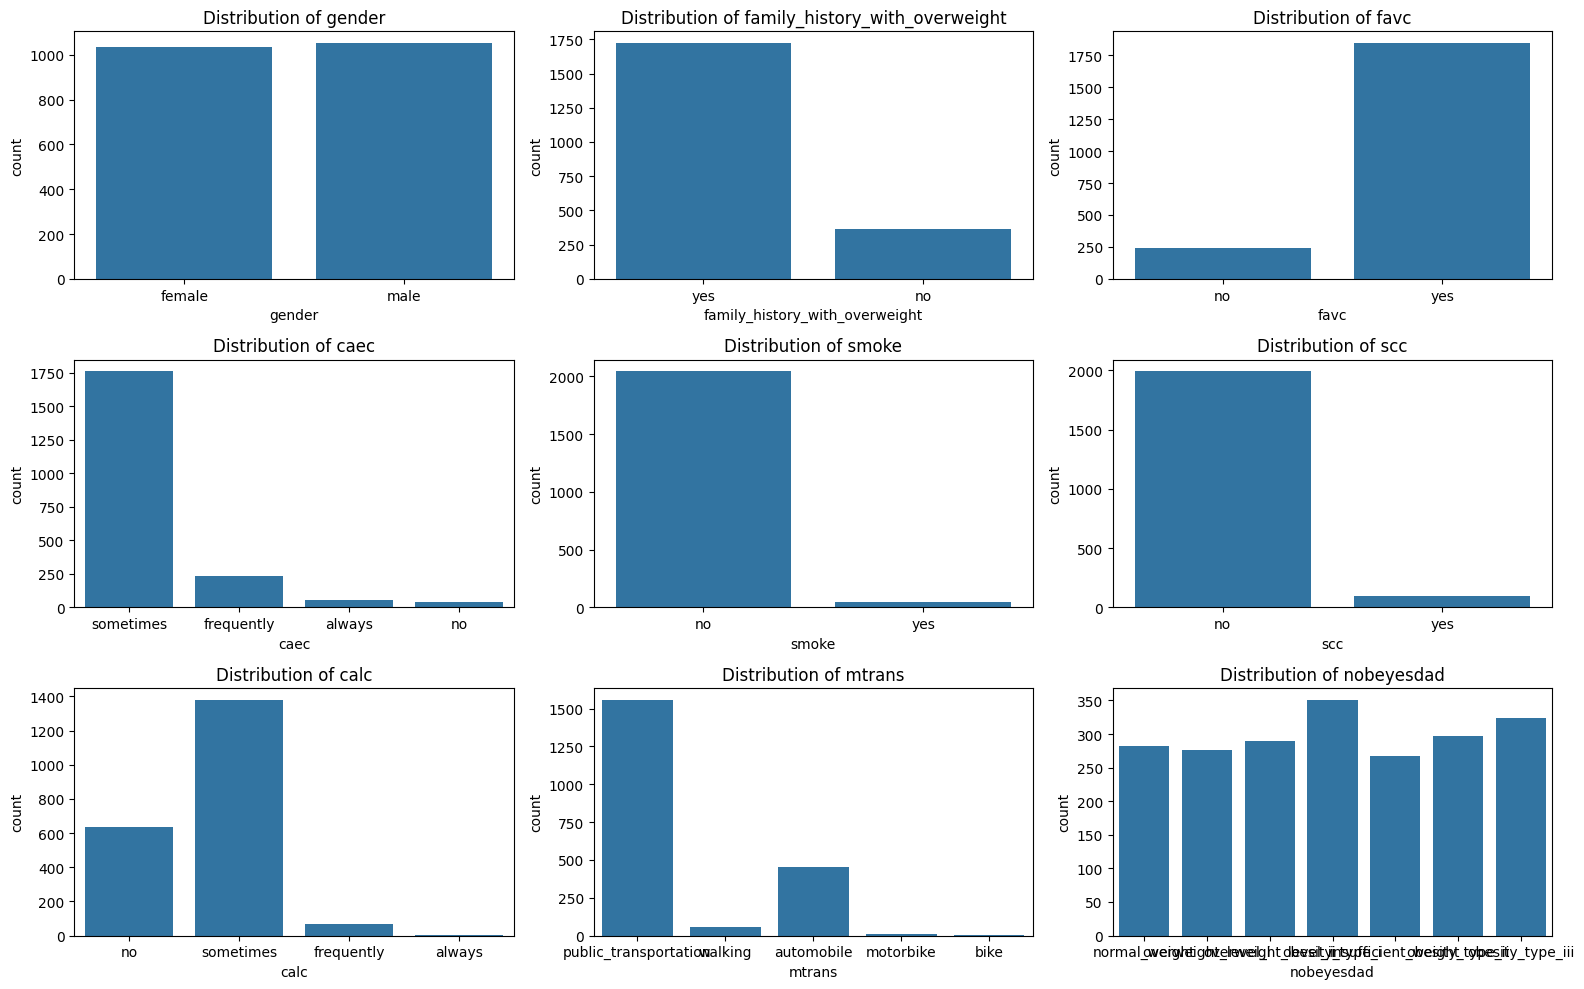

In [10]:
# Plot bar plots for categorical features
categorical_columns = df.select_dtypes(include=['object']).columns

plt.figure(figsize=(16, 10))
n_cols = 3
n_rows = (len(categorical_columns) + n_cols - 1) // n_cols

for i, col in enumerate(categorical_columns):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.countplot(x=col, data=df)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()


 Correlation Matrix (Heatmap)

In [14]:
# Apply label encoding to categorical variables
from sklearn.preprocessing import LabelEncoder

# Identify categorical columns (object type)
categorical_columns = df.select_dtypes(include=['object']).columns

# Apply label encoding to the identified categorical columns
label_encoder = LabelEncoder()
for col in categorical_columns:
    df[col] = label_encoder.fit_transform(df[col])

print("Label encoding applied to the categorical variables:")
df.head() # Display the first few rows of the encoded columns


Label encoding applied to the categorical variables:


,gender,age,height,weight,family_history_with_overweight,favc,fcvc,ncp,caec,smoke,ch2o,scc,faf,tue,calc,mtrans,nobeyesdad
0,0,21.0,1.62,64.0,1,0,2.0,3.0,3,0,2.0,0,0.0,1.0,2,3,1
1,0,21.0,1.52,56.0,1,0,3.0,3.0,3,1,3.0,1,3.0,0.0,3,3,1
2,1,23.0,1.80,77.0,1,0,2.0,3.0,3,0,2.0,0,2.0,1.0,1,3,1
3,1,27.0,1.80,87.0,0,0,3.0,3.0,3,0,2.0,0,2.0,0.0,1,4,5
4,1,22.0,1.78,89.8,0,0,2.0,1.0,3,0,2.0,0,0.0,0.0,3,3,6
